# Sea Level

### <font color=red> Please use the template below to answer the _complete workshop questions from the course notes_.</font>

### your name: Frank D'Agostino

### Required installations first:

from a terminal try: <br>
 conda install cartopy <br>
 pip install gsw <br>

Another option for cartopy: in Anaconda Navigator, click Environments, then change in the pull-down menu "Installed" to "All"; find cartopy, mark it for installation and click Apply.  

If both of these options do not work, try "pip install cartopy" instead of "conda install cartopy" for cartopy. 

In [2]:
# import needed libraries and load data:
import numpy as np
import numpy.matlib as matlib
import pickle
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import gsw
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature
from cartopy import config
from matplotlib.colors import BoundaryNorm

# Read 2-d sea surface data for historical and rcp85 experiment
with open('./sea_level_variables.pickle', 'rb') as file:
    d = pickle.load(file)
    # print information about each extracted variable:
    for key in list(d.keys()):
        print("extracting pickled variable: name=", key,  "; size=", d[key].shape)
        #print("type=",type(d[key]))
    globals().update(d)

extracting pickled variable: name= sealevel_lon ; size= (384, 320)
extracting pickled variable: name= sealevel_lat ; size= (384, 320)
extracting pickled variable: name= sealevel_historical ; size= (156, 384, 320)
extracting pickled variable: name= sealevel_historical_years ; size= (156,)
extracting pickled variable: name= sealevel_rcp85 ; size= (95, 384, 320)
extracting pickled variable: name= sealevel_rcp85_years ; size= (95,)
extracting pickled variable: name= areacello ; size= (384, 320)
extracting pickled variable: name= Temperature_ocean_lon ; size= (384, 320)
extracting pickled variable: name= Temperature_ocean_lat ; size= (384, 320)
extracting pickled variable: name= Temperature_ocean_lev ; size= (60,)
extracting pickled variable: name= Temperature_ocean_1850 ; size= (60, 384, 320)
extracting pickled variable: name= Temperature_ocean_2100 ; size= (60, 384, 320)
extracting pickled variable: name= GMSL_thermosteric_historical ; size= (1872,)
extracting pickled variable: name= GMSL

### Explanation of input variables: 

sealevel_historical and sealevel_rcp8.5 both have zero spatial mean, and therefore represent only the deviation from this mean. the GMSL itself (contribution due to ocean warming) is given by GMSL_thermosteric_historical and GMSL_thermosteric_rcp85.

areacello gives the area of each grid cell, used to calculate spatial averates

## 1a) plot GMSL time series

SSH_fit=x[0]*years**2+x[1]*years+x[2]; where x= 1.0202222621483019e-05 -0.039166181176688096 37.58492594202206


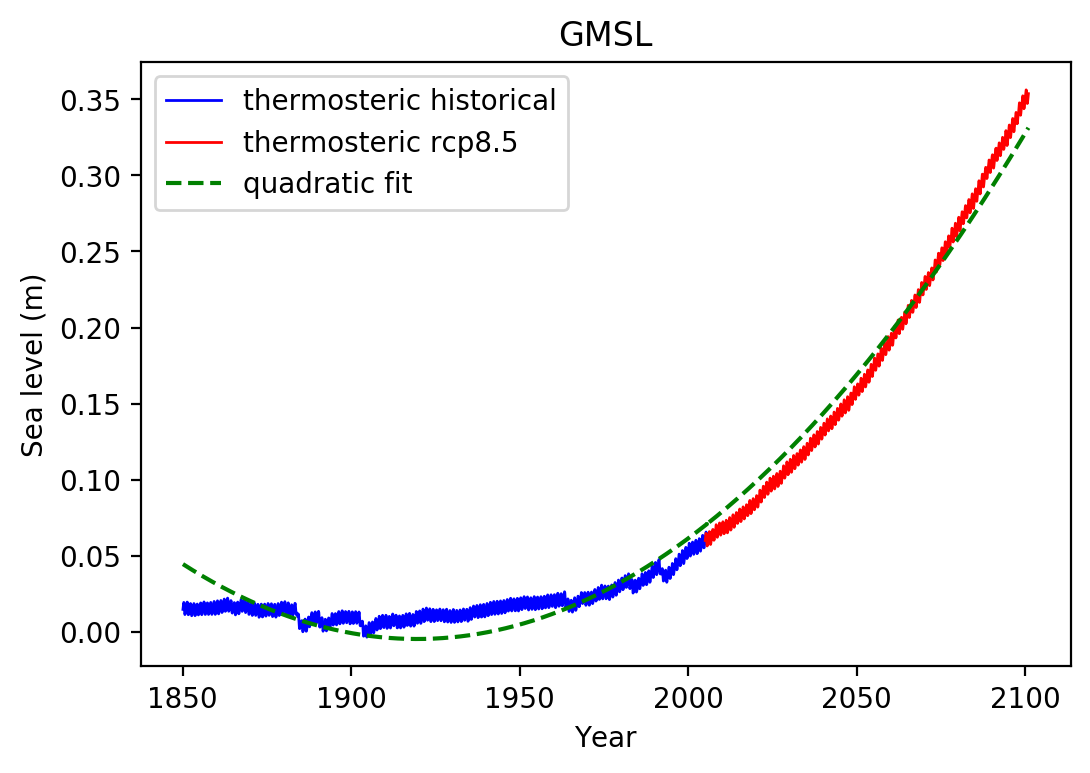

In [2]:
# combine historical and rcp85 records into one:
years=np.hstack([GMSL_thermosteric_historical_years,GMSL_thermosteric_rcp85_years]); 
SSH=np.hstack([GMSL_thermosteric_historical,GMSL_thermosteric_rcp85])

## least square fit of the time series to a parabola
x=np.polyfit(years, SSH, 2) # use np.polyfit
SSH_fit=x[0]*years**2+x[1]*years+x[2];

print("SSH_fit=x[0]*years**2+x[1]*years+x[2]; where x=",x[0],x[1],x[2])

# plot GMSL and fit:
plt.figure(dpi=200)
plt.plot(GMSL_thermosteric_historical_years, GMSL_thermosteric_historical,"b",lw=1,label="thermosteric historical")
plt.plot(GMSL_thermosteric_rcp85_years, GMSL_thermosteric_rcp85,"r",lw=1,label="thermosteric rcp8.5")
plt.plot(years, SSH_fit,'g--',label="quadratic fit")
plt.xlabel('Year')
plt.ylabel('Sea level (m)');
plt.legend();
plt.title('GMSL');

### discussion:

The rate of sea level rise changes in these scenarios due to the exponential growth of carbon dioxide in the atmosphere, which is drastically increasing global temperatures. Furthermore, these increased temperatures melt glacial ice and expand the oceans, causing a compounding increase on sea level rise.

## 1b) Contour sea level rise:

It seems like there will be much more sea level rise within the next one hundred years in all parts of the world, except for the Southern Ocean. The Southern Ocean around Antarctica looks as if it remains relatively stable, with only a slight increase in sea level.


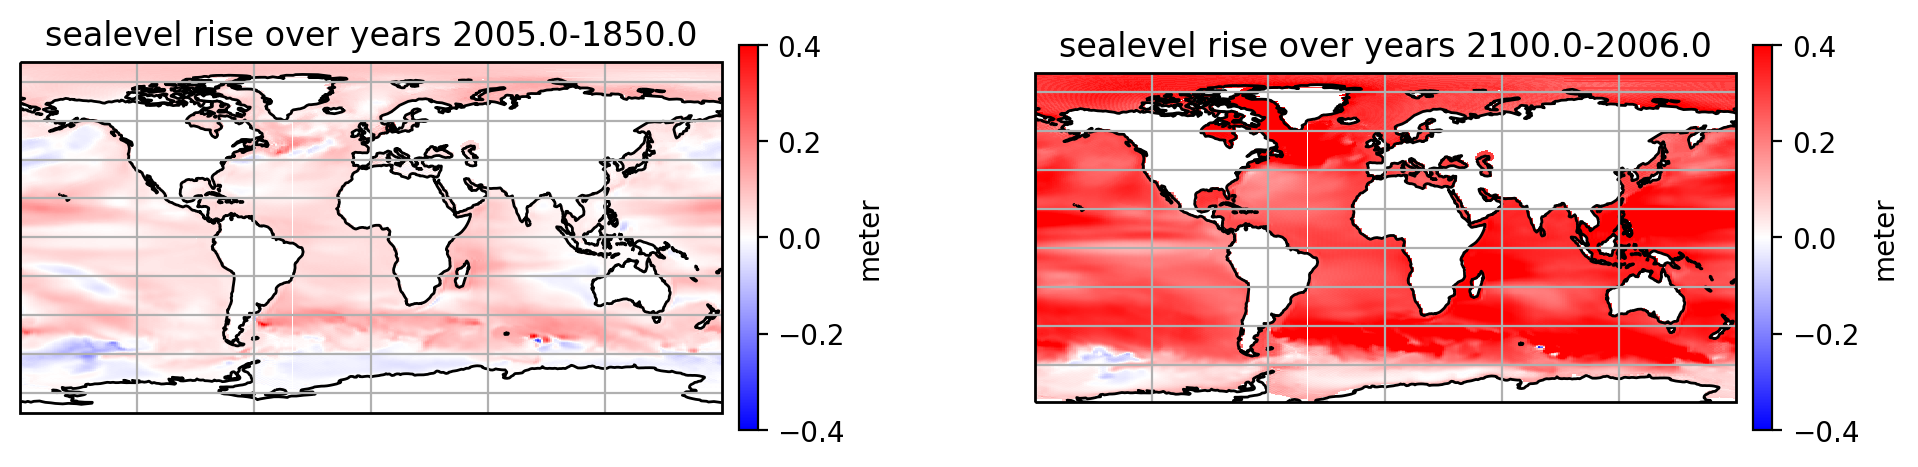

In [3]:
# contour sea level changes across historical and rcp85 periods:
# preliminaries, defining configuration of subplots:
projection=ccrs.PlateCarree()
fig,axes=plt.subplots(1,2,figsize=(12,6)\
                      ,subplot_kw={'projection': projection},dpi=200)
cmap = plt.get_cmap('jet')

# plot historical GMSL:
axes[0].set_extent([0, 359.999, -90, 90], crs=ccrs.PlateCarree())
axes[0].coastlines(resolution='110m')
axes[0].gridlines()
c=axes[0].pcolormesh(sealevel_lon,sealevel_lat\
               ,(sealevel_historical[-1,:,:]-sealevel_historical[0,:,:])\
                +(GMSL_thermosteric_historical[-1]-GMSL_thermosteric_historical[0]) \
               ,vmin=-0.4,vmax=0.4\
                     ,cmap="bwr"\
              ,transform=ccrs.PlateCarree())
axes[0].set_title("sealevel rise over years "+repr(sealevel_historical_years[-1])
                                      +"-"+repr(sealevel_historical_years[0]))
clb=plt.colorbar(c, shrink=0.425, pad=0.02,ax=axes[0],label="meter")

# plot rcp8.5 GMSL:
axes[1].coastlines(resolution='110m')
axes[1].gridlines()
c=axes[1].pcolormesh(sealevel_lon,sealevel_lat\
               ,(sealevel_rcp85[-1,:,:]-sealevel_rcp85[0,:,:])\
                +(GMSL_thermosteric_rcp85[-1]-GMSL_thermosteric_rcp85[0]) \
               ,vmin=-0.4,vmax=0.4\
                     ,cmap="bwr"\
              ,transform=ccrs.PlateCarree())

axes[1].set_title("sealevel rise over years "+repr(sealevel_rcp85_years[-1])
                                      +"-"+repr(sealevel_rcp85_years[0]))
clb=plt.colorbar(c, shrink=0.425, pad=0.02,ax=axes[1],label="meter")


print("It seems like there will be much more sea level rise within the next one hundred years in all parts of the world, except for the Southern Ocean. The Southern Ocean around Antarctica looks as if it remains relatively stable, with only a slight increase in sea level.")

## 2a) plot density of ocean water as function of temperature

alpha(2C),alpha(10C) = 7.78514465691453e-05 0.00016625612540220982
Delta rho(3-2C) Delta rho(11-10C) = -0.08627211389671174 -0.17579637159406047


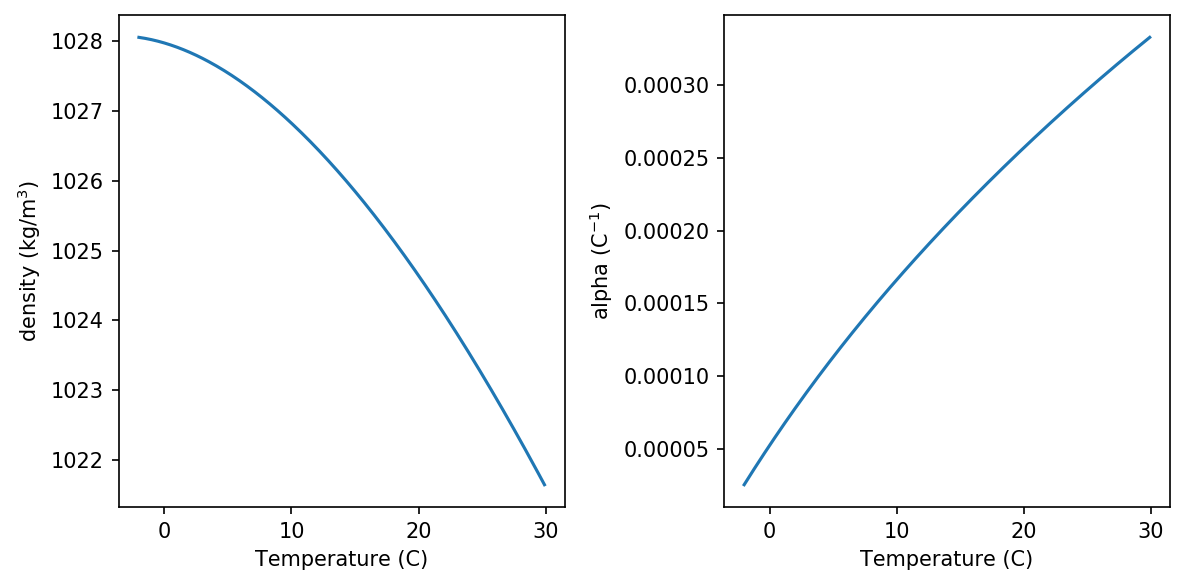

In [4]:
T=np.arange(-2,30,0.1)
S=T*0+35
P=T*0
rho=gsw.rho(S,T,P)
alpha=gsw.alpha(S,T,P)

print("alpha(2C),alpha(10C) =",gsw.alpha(35, 2, 0),gsw.alpha(35, 10, 0))
print("Delta rho(3-2C) Delta rho(11-10C) =",gsw.rho(35, 3, 0)-gsw.rho(35, 2, 0),gsw.rho(35, 11, 0)-gsw.rho(35, 10, 0))
plt.figure(figsize=(8,4),dpi=150)
plt.subplot(1,2,1)
plt.plot(T, rho)
plt.xlabel("Temperature (C)")
plt.ylabel("density (kg/m$^3$)")

plt.subplot(1,2,2)
plt.plot(T, alpha)
plt.xlabel("Temperature (C)")
plt.ylabel("alpha (C$^{-1}$)")

plt.tight_layout()
plt.show();

## 2b) Calculate the expected sea level rise for a given vertical warming profile

The warming will lead to 0.333 meters of sea level rise.
The warming will lead to 0.655 meters of sea level rise when the decay scale is 1000 instead of 500 (roughly double).


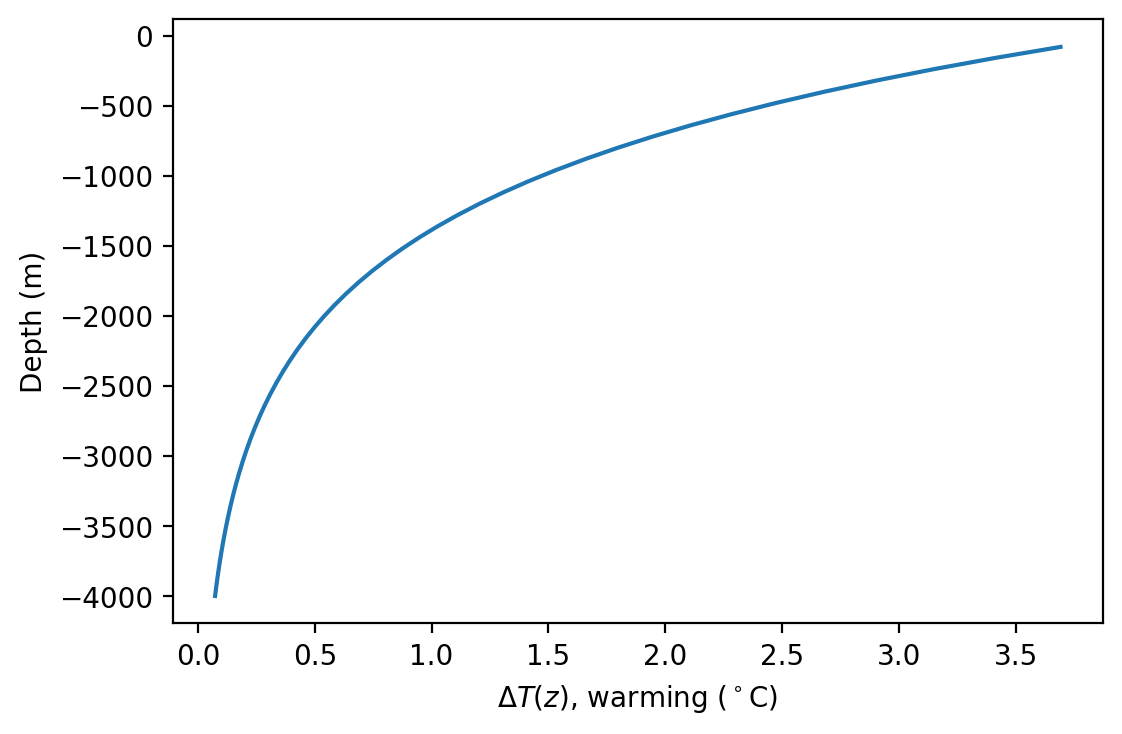

In [4]:
# calculate the expected GMSL rise:
h=4000.0; # average depth of the ocean
alpha=0.0001668; # thermal expansion coefficient at T=10 degrees Celsius
decay_scale=500
# I actually integrated this by hand
# when we integrate by hand, we get about 500*4*alpha*(e^0 - e^(-4000/500))
Delta_GMSL= decay_scale*4*alpha*(np.exp(0)-np.exp(-h/decay_scale))
print("The warming will lead to %5.3g meters of sea level rise." % Delta_GMSL)

# If the decay scale is 1000 instead of 500
decay_scale=1000
Delta_GMSL= decay_scale*4*alpha*(np.exp(0)-np.exp(-h/decay_scale))
print("The warming will lead to %5.3g meters of sea level rise when the decay scale is 1000 instead of 500 (roughly double)." % Delta_GMSL)

# plot the warming temperature profile:
plt.figure(dpi=200)
z=np.arange(-h,0,h/50)
Delta_T=4*np.exp(z/decay_scale)
plt.plot(Delta_T,z)
plt.xlabel("$\Delta T(z)$, warming ($^\circ$C)")
plt.ylabel("Depth (m)")
plt.show();


## 3) Calculate the GMSL rise from 3d warming projections for 1850-2100:

Assume that salinity is a constant at 35 ppt, considering only the effects of temperature rise.

GMSL rise due to warming is 0.295 m


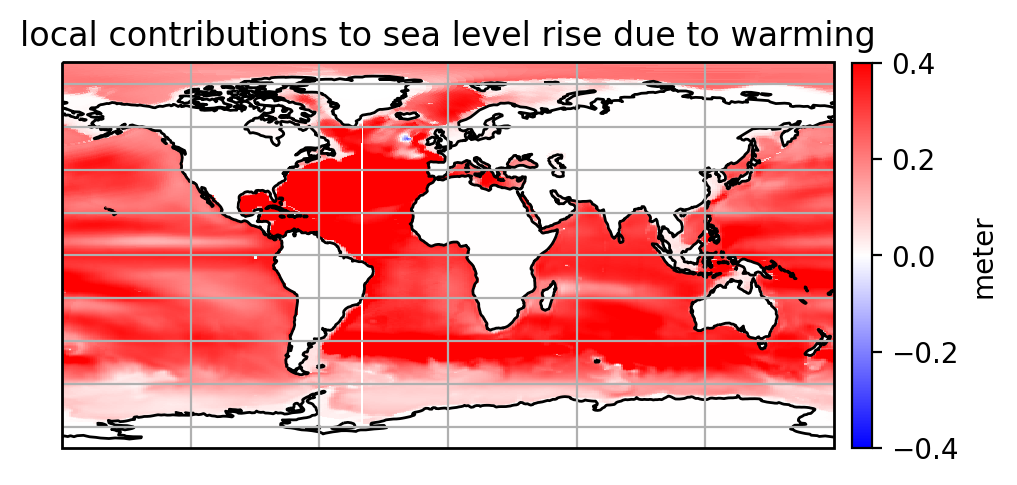

In [5]:
# calculate ocean layer thicknesses:
dZ=np.zeros(len(Temperature_ocean_lev))
dZ[1:]=Temperature_ocean_lev[1:]-Temperature_ocean_lev[0:-1]
dZ[0]=Temperature_ocean_lev[0]
dZ[-1]=0

# calculate ocean densities before and after the warming:
Salinity=np.zeros(Temperature_ocean_1850.shape)+35
theta1=Temperature_ocean_1850-273.15  # convert to Celsius
pressure=np.zeros(theta1.shape)
rho1=gsw.rho(Salinity,theta1,pressure)

theta2=Temperature_ocean_2100-273.15 # convert to Celsius
rho2=gsw.rho(Salinity,theta2,pressure)

# calculate the sea level rise at each horizontal location by vertically
# integrating over the appropriate density ratio to find dSSH locally:
density_ratio = (rho1 - rho2)/rho1
Nz,Ny,Nx=density_ratio.shape
dSSH=np.zeros((Ny,Nx))

for i in range(Nx):
    for j in range(Ny):
        for k in range(Nz):
            # integrate over non-NaN values only!
            if ~np.isnan(rho1[k,j,i]):
                dSSH[j,i]=dSSH[j,i]+dZ[k]*density_ratio[k, j, i]

# calculate global averaged GMSL rise using weighting by the variable areacello:
dGMSL=np.nansum((dSSH*areacello)/np.nansum(areacello)) # can use np.nansum
print("GMSL rise due to warming is %5.3g m" % dGMSL)

## make a pcolormesh figure of the pattern of SSH anomaly
projection=ccrs.PlateCarree()
fig,axes=plt.subplots(1,1,figsize=(6,6)\
                      ,subplot_kw={'projection': projection},dpi=200)
axes.set_extent([0, 359.999, -90, 90], crs=ccrs.PlateCarree())
axes.coastlines(resolution='110m')
axes.gridlines()
c=axes.pcolormesh(Temperature_ocean_lon,Temperature_ocean_lat\
               ,dSSH \
               ,vmin=-0.4,vmax=0.4\
                     ,cmap="bwr"\
              ,transform=ccrs.PlateCarree())
axes.set_title("dSSH")
clb=plt.colorbar(c, shrink=0.425, pad=0.02,ax=axes,label="meter")
axes.set_title("local contributions to sea level rise due to warming");

## 4) Calculate wind-driven sea level rise in the Adriatic Sea

In [50]:
# define parameters and variables to be use
Rhoa=1.22;  # kg/m^3, density of air
Cd=0.0013;  # bulk formula coefficient
U=30;    # m/s, wind speed
U_km_per_hour=108
rho0=1023.6;  # kg/m^3, density of sea water
g=9.81;  # m/s^2, acceleration due to gravity
L=800000;  # m, the length of the northern Adriatic Sea in meters
h=259.5; # the approx average depth of the Adratic Sea north of Monte Gargano, in meters

# calculate wind stress using the bulk formula
tau=Rhoa*Cd*U*abs(U)
# calculate the sea level difference along the whole length of the Adratic sea
dH=(tau*L)/(g*rho0*h)

# print results:
print("Given a wind speed of U= %3.3g m/s (%3.3g km/hour), the stress is tau= %3.2g N/m^2," % (U,U_km_per_hour,tau) )
print("and the sea level rise in the northern edge of the Adriatic Sea is expected to be %4.2g meters." % dH );

Given a wind speed of U=  30 m/s (108 km/hour), the stress is tau= 1.4 N/m^2,
and the sea level rise in the northern edge of the Adriatic Sea is expected to be 0.44 meters.


## 5) fingerprinting 

The melting happens in Antarctica because as the ice melts in Antarctica, it loses a significant amount of mass. As such, it then exerts less of a gravitational force on the surrounding water, causing the water to recede and the seafloor to sink. Therefore, the sea level will not be as high or may even decrease in comparison to an increase in sea level worldwide due to the increase of water in the ocean. 